# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df["Diff"] = df["Adj Close"].diff().shift(-1)
df["Target"] = np.sign(df["Diff"])
df["Premium"] = 0.08 * df["Adj Close"]

In [4]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data and build a LogReg on column 2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [7]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30", :].copy()

In [8]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

In [9]:
df

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-05-31,176.778061,16.675507,1.0,14.142245
2023-06-30,193.453568,2.473389,1.0,15.476285
2023-07-31,195.926956,-8.304138,-1.0,15.674156


# 4.) Add columns, prediction and profits.

In [10]:
df["Predictions"] = y_pred

In [11]:
df["Profits"] = 0.

#True Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]

#False Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100*df["Diff"] + df["Premium"]

# 5.) Plot profits over time

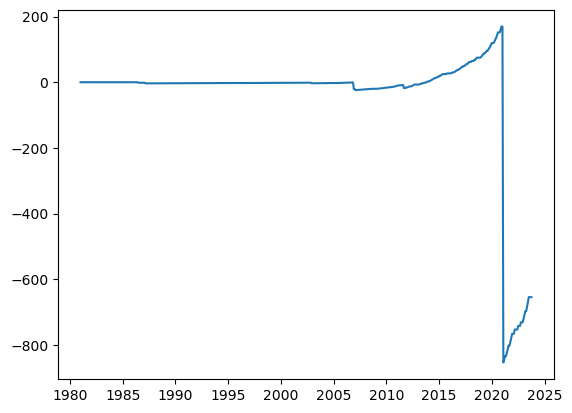

In [12]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

## 5.5)

At the core of the blockchain industry is data, which can be vast and complex. The skills of data management and advanced analytics allow us to effectively handle and interpret this data. This skill is crucial for analyzing blockchain transactions, understanding market trends, and making data-driven decisions in cryptocurrency investments.The econometric techniques and predictive modeling skills learned in the program can be applied to forecasting market movements, assessing risk, and identifying potential investment opportunities in the crypto market. Moreover, the knowledge of economic theories enable us to analyze market behaviors, understand the implications of regulatory changes, and predict market responses to technological advancements in blockchain.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.